               EVERY WORD WRITTEN IS SELF-CHOSEN AND NOT MERELY A CUT-COPY-PASTE VERSION OF THE EXISTING ONES
                                     SO HAVE PATIENCE AS WE START OUR RIDE !

### 1. BACKGROUND 





           Market Attribution :-



1. Simple Definition - science of determining which marketing tactics are contributing to sales or conversions.


2. Technical Definition - practice of evaluating the marketing touchpoints (Social Media,Online Advertisements,Digital Marketing Content, Company Events, Peer Referral, Conversations With Company Representatives, Product Catalogs)a consumer encounters on their path to purchase. 



           Goal of attribution :-
           
To determine which channels had the greatest impact on the decision to convert, or take the desired next step. The insights provided by models into how, where, and when a consumer interacts with brand allows marketing teams to alter and customize campaigns, thus improving marketing ROI(return on investment).



### 2. PROBLEM STATEMENT  - To give a data driven approach for managing advertising investments of a ﬁrm.






An FMCG company that sells toothpastes has spent on advertising it's product through various channels (online and offline) and has recieved diverse amounts of sales from each of these channels. Given the company's expenditure and sales data on these channels for the past 7 months, we need to achieve the below objectives :-

1. Find out the attribution of each channel in the sales 



2. Predict the future sales - will help us maximise the expected sales for the next period, subject to a budget constraint for the advertising channels.




### 3. DATA  


    Marketing data appear in a variety of forms. A frequently occurring form is time-series data.
    Our data is no different ! it falls under the "historically observed advertising-spending and emerged sales patterns" category. 
    
    
           WE DON'T HAVE DATA , LET'S DESIGN OUR OWN DATASET FOR THE PROBLEM STATEMENT !

#### A) DATA CREATION

In [7]:
import pandas as pd

A sale is a transaction between buyer and a seller.

In [4]:
# sample data that has sales(the transactions) through and expenditures on different channels(online and offline) 
# for the past 5  months (monthly details)

#cols = ['TimePeriod','Exp_Facebook','Sales_Facebook','Exp_Youtube','Sales_Youtube','Exp_instagram','Sales_instagram',
#      'Exp_hoardings','Sales_hoardings','Exp_retail_outlets','Sales_retail_outlets',
#      'Exp_Mall_outlets','Sales_Mall_Outlets',
#      'Exp_retailer_website','Sales_retailer_website','Exp_online_advertisement','Sales_online_advertisement',
#      'Exp_digital_marketing_content','Sales_digital_marketing_content','Total_Sales']

In [6]:
# expenditure in rupees, sales are number of transactions
# we didn't consider sales as revenue generated through that channel here.
mydict = {'TimePeriod':['Jan-2021','Feb-2021','Mar-2021','Apr-2021','May-2021'],
          'Exp_Facebook':[10,30,70,100,120],'Sales_Facebook':[100,400,600,700,850],
        'Exp_Youtube':[15,25,30,20,15],'Sales_Youtube':[120,130,140,135,100],
        'Total_Sales':[1025,2500,2700,3120,3220]}

**NOTE** - no idea how the structure of the real time data set looks like,
tried to access the data online from diferent sources to understand the skeleton, but couldn't find the one that suits our requirements,so tried to come up with my own version of the data needed to solve the case study.

In [8]:
data = pd.DataFrame(mydict)
data

,TimePeriod,Exp_Facebook,Sales_Facebook,Exp_Youtube,Sales_Youtube,Total_Sales
0,Jan-2021,10,100,15,120,1025
1,Feb-2021,30,400,25,130,2500
2,Mar-2021,70,600,30,140,2700
3,Apr-2021,100,700,20,135,3120
4,May-2021,120,850,15,100,3220


####  B) DATA ANALYSIS






           
          FIRST THINGS FIRST ! LET'S DO OUR DATA ANALYSIS AND UNDERSTAND THE DATA !!

In [40]:
data.describe()

,Exp_Facebook,Sales_Facebook,Exp_Youtube,Sales_Youtube,Total_Sales
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,66.000000,530.000000,21.000000,125.000000,2513.000000
std,46.151923,290.688837,6.519202,15.811388,882.833506
min,10.000000,100.000000,15.000000,100.000000,1025.000000
25%,30.000000,400.000000,15.000000,120.000000,2500.000000
50%,70.000000,600.000000,20.000000,130.000000,2700.000000
75%,100.000000,700.000000,25.000000,135.000000,3120.000000
max,120.000000,850.000000,30.000000,140.000000,3220.000000


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.plot(,data['Exp_Facebook'])

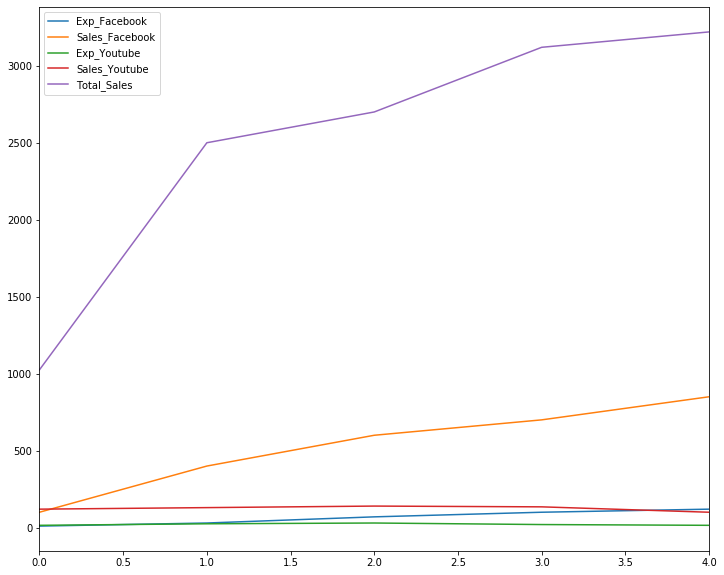

In [60]:
plt.figure(figsize=(12,10))
data['Exp_Facebook'].plot(kind='line',legend='Expenditures on Facebook')
data['Sales_Facebook'].plot(kind='line',legend='Sales on Facebook')
data['Exp_Youtube'].plot(kind='line',legend='Expenditures on Youtube')
data['Sales_Youtube'].plot(kind='line',legend='Sales on Youtube')
data['Total_Sales'].plot(kind='line',legend='Total Sales')


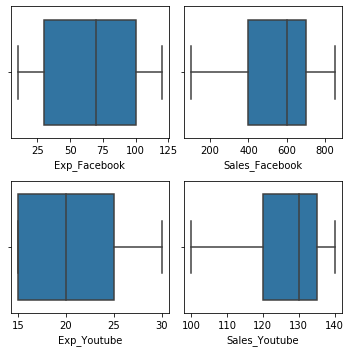

In [42]:
fig, axs = plt.subplots(2,2, figsize = (5,5))
plt1 = sns.boxplot(data['Exp_Facebook'], ax = axs[0][0])
plt2 = sns.boxplot(data['Sales_Facebook'], ax = axs[0][1])
plt3 = sns.boxplot(data['Exp_Youtube'], ax = axs[1][0])
plt4 = sns.boxplot(data['Sales_Youtube'], ax = axs[1][1])
plt.tight_layout()

In [ ]:
'''

KEY OBSERVATIONS - (had the units been the same , there would have been more relevant and significant observations)

1. The expenditure on facebook channel, majorly lies in the range 30-100 rupees, every month

2. The expenditure on youtube channel, majorly lies in the range 15-25 rupees, every month

3. Over time the company increased its expenditure on its facebook channel and is maintaining the same expenditure
on youtube.

4. Cleary, the reason for the above cause can be , when the company started with similar amounts of expenditure 
on both the channels, facebook has brought greater sales than youtube.

5. The overall sales meter is very high indicating the continuous demand of the product.

6. All in all the product sales in general is earning greater profits irrespective of the channels used to advertise. 


'''

#### C) DATA PRE-PROCESSING 

           LET'S FOLLOW A FEW PREPROCESSING STEPS !!

                      - NULL VALUE TREATMENT
    
                      - OUTLIER TREATMENT
        
                      - FEATURE SELECTION (METHODS OR BUILD OLS MODEL AND UNDERSTAND THE SIGNIFICANCE 
                        USING P VALUES)
            
                      - DIMENSIONALITY REDUCTION IF NECESSARY
                
                      - SCALING THAT HELPS THE OPTIMISER (GD/RMSPROP/ADAM) CONVERGE FASTER
                    
                      - ENCODING (LABEL ENCODING/ONE-HOT/DUMMIFICATION) QUALITATIVE VARIABLES IF ANY.
                   


Now let's get to the modelling part !


### 4. RESEARCH - ATTRIBUTION MODELS


Attribution models analyze which marketing channels, receive credit for a conversion/sale. We have 

1. Traditional Attribution models - First Interaction,Last Interaction,Linear,Time-Decay
2. Machine learning based Attribution models


Our focus is on the type 2 Attribution models - Below is the research analysis regarding the same












**CONTEXT :-**



Modelling sales-advertising relationships is one of the most researched areas in marketing.It has been observed that  there are 2 ways to model this data  -

1. Econometric model approach - statistical models used in econometrics like linear regression,logit etc..


2. Time series analysts approach - multi-variate timeseries analysis

             
        Problems with Econometric model approach - the data has auto correlation, multi-collinearity or high                 seasonality issues(we'll see that going forward).


       The disadvantage of the econometric modellers for not observing the data (apart from basic summary                    statistics)before finally specifying the model led to choosing the time-series analysts approach of                  understanding the data in hand first, and then associating it with different properties(auto correlation,            multi-collinearity) of empirical data derived from a hypothesized model for time series to guess at what the          best descriptive model could look like.







**RESEARCH :-** 


Choosing the **time-series analysts approach** (a **long-standing** procedure) and keeping in mind our problem statement, the below three research papers were studied :-


1. https://prasadnaik.faculty.ucdavis.edu/wp-content/uploads/sites/422/2016/11/tsm2008.pdf


2. https://www.researchgate.net/publication/322355159_Assessing_the_effect_of_advertising_expenditures_upon_sales_A_Bayesian_structural_time_series_model


3. http://www.mmaglobal.org/publications/MMJ/MMJ-Issues/2012-Fall/MMJ-2012-Fall-Vol22-Issue2-Wilcox-Kim-pp90-101.pdf

     After going through all the research points to build Sales-Response models , the below approaches 
     that align our problem statement objectives have been shortlisted.

### 5. APPROACHES









1. **1st objective** is about understanding the **relationship** between advertising expenditure and sales,based on the historical data - techniques like linear regression(when order is not important),Vector Auto Regression (VAR) are used, VAR is able to understand and use the relationship between several variables. 



2. **2nd objective** is a **prediction** problem where we are forecasting sales given historical advertising data - Multi-Variate Time series model using LSTM 
   ,here prediction is the primary goal. You can get accurate predictions but may not know the underlying reason. 



3. **Both objectives** - Bayesian structural time series model as per  research oﬀers low pre-dictive errors while maintaining interpretability.

      Fun Fact -  Times series analysis began with univariate modeling based on a single variable and has advanced 
              to multivariate models ,however ,univariate models do not handle the cause-and-effect situations!!                   that's central to solving our objectives, therefore we chose multivariate models.

### 6. MODEL BUILDING  &  EVALUATION (METRICS)  -   NOW WE ARE TALKING ...

       WE WILL BUILD 3 MODELS :-
       
       1.BASIC MODEL FOR INTERPRETABILITY - LINEAR REGRESSION 
       
       2.THE BEST MODEL FOR INTERPRETABILITY - VECTOR AUTO REGRESSION (VAR)
       
       3.BEST MODEL FOR FORECASTING SALES - LSTM

**NOTE** - If the data is equi-spaced, the time variable, may be explicitly used for plotting the series but not used in the time series model itself. Our data is equi-spaced (monthly data)





         what are the situations when the metrics - MAE,RMSE are used ?

#### A) Regression Analysis

In [53]:
data

,TimePeriod,Exp_Facebook,Sales_Facebook,Exp_Youtube,Sales_Youtube,Total_Sales
0,Jan-2021,10,100,15,120,1025
1,Feb-2021,30,400,25,130,2500
2,Mar-2021,70,600,30,140,2700
3,Apr-2021,100,700,20,135,3120
4,May-2021,120,850,15,100,3220


In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
# we build model on the training 
x = data.drop(['TimePeriod','Total_Sales'],axis=1)
y = data['Total_Sales']

In [16]:
x

,Exp_Facebook,Sales_Facebook,Exp_Youtube,Sales_Youtube
0,10,100,15,120
1,30,400,25,130
2,70,600,30,140
3,100,700,20,135
4,120,850,15,100


In [12]:
y

0    1025
1    2500
2    2700
3    3120
4    3220
Name: Total_Sales, dtype: int64

In [18]:
lm=LinearRegression()

In [19]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.intercept_

-1441.8902439024432

In [21]:
list(zip(x,lm.coef_))

[('Exp_Facebook', -37.31910569105694),
 ('Sales_Facebook', 9.082520325203259),
 ('Exp_Youtube', -75.92682926829272),
 ('Sales_Youtube', 25.58943089430897)]

In [49]:
y_pred = lm.predict(x)

In [51]:
# training performance - how is the model learning
mse = metrics.mean_squared_error(y,y_pred)
RMSE = np.sqrt(mse)
RMSE

8.385126836667848e-13

In [ ]:
'''

The equation formed :-

     Total_sales = -37.32*Exp_Facebook + 9.08*Sales_Facebook - 75.93*Exp_Youtube + 25.59*Sales_Youtube - 1441.89
             
Interpretation :- 

1 rupee increase in Facebook expenditure leads to 37.32 units decrease in sales keeping other factors constant

1 unit increase in sales through facebook leads to 9.08 units increase in total sales 

1 rupee increase in Youtube expenditure leads to 75.93 units decrease in sales keeping other factors constant

intercept - if there was no change in the exp & sales, your company would still make some total sales.

1 unit increase in sales through youtube leads to 25.59 units increase in total sales which is greater than facebook 
contribution to total sales, but the expenditure on youtube is also greater.

So,The above regression analysis is a failure here in terms of interpretability because the analysis is done
on highly correlated features and regression hypothesis is interpreted following an assumption that
when one quantity changes rest of the quanties remain constant.


In general,for sales prediction, regression model can be used, but not for our dataset,
because of multi-collinearity.
'''

In [55]:
# higly correlated features
data['Exp_Facebook'].cov(data['Sales_Facebook'])

13025.0

In [ ]:
'''
If we try PCA to eliminate multi-collinearity and then do the regression analysis, 
the final model hypothesis containing principle components as features won't be inference friendly.
'''

#### B) Multi-variate time series analysis - using LSTM 

Research Sources -

https://openreview.net/pdf?id=HklVMnR5tQ

https://www.youtube.com/watch?v=4FmVIpcwl4k

             - Objective 2 - subject to a adverstising budget constraint predict the future sales
             
             - given input sales and expenditure details predict the monthly sales 
             
             - this can be used to take decisions like maximising sales given budget constraints

             - in LSTM, time attribute is not considered as input
             
             - we will be taking total sales as input as well as the target (create input vectors,target)
             
             - Based on the window length(time period) considered , LSTM will predict the upcoming sales 
             after a time period by analysing the previous sales given as input (it would do this by 
             maintaining an internal state and summarising what it learned so far).
 


             Benefits of Using Deep Learning to Analyze our Time Series data !!!



1. Easy-to-extract features: Deep neural networks minimize the need for data scaling procedures and stationary data and feature engineering processes which are required in time series forecasting. These neural networks of deep learning can learn on their own. With training, they can extract features on their own from the raw input data. 



2. Good at extracting patterns: Each neuron in Recurrent Neural Networks is capable to maintain information from the previous input using its internal memory. Hence, it is the best choice for the sequential data of Time Series. 



3. Easy to predict from training data: The Long short-term memory (LSTM) is very popular in time series. Data can be easily represented at different points in time using deep learning models like gradient boosting regressor, random forest, and time-delay neural networks.

#### C) Multivariate Time Series – Vector Auto Regression (VAR)



                 - underastands the relationship between target and predictors
                 
                 - also understands the relationship between the predictors which linear regression 
                   is failing to do
                 
                 - much suitable choice for calculating the contribution of each channel to the total sales.
                 
                 - also solves the forecasting objective 

In [ ]:
# basic model building
# looked for solved case study videos
#need more theoretical and practical exposure

#### D) About Bayesian structural time series model - An Ideal Choice !


Research source - Assessing the effect of advertising expenditures upon sales : a bayesian structural time series model.
https://www.researchgate.net/publication/322355159_Assessing_the_effect_of_advertising_expenditures_upon_sales_A_Bayesian_structural_time_series_model



                 Some interesting points about this model and the underlying research !!
                 
                 1.Two diverging model-building schools seem to dominate the marketing literature :
                 
                      - Priori models that rely heavily on intuition and are derived from 
                        general principles - mathematical models independent from experience 
                        which doesnot depend on empirical evidence. (academic concept)
                        
                      - statistical or econometric models, which usually start from a speciﬁc 
                        dataset to be modelled - the ones we have been looking at so far,based 
                        on empirical evidence.
                        
                 2.The proposed model belongs to the first school.
                        
                 3. A robust implementation of the Nerlove–Arrow model(mathematical model)
                 using a Bayesian structural time series model to explain the relationship 
                 between advertising expenditures of a country-wide fast-food franchise 
                 network with its weekly sales has been given.
                 
                 4.Its Bayesian nature facilitates incorporating a priori information reﬂecting 
                 the manager’s views,which can be updated with relevant data. 
                 
                 5.This model can be well suited to generalize it to othermarkets or situations.
                 
                 6. Applying this to our situation - we can explain the relationship between 
                 advertising expenditures of our FMCG company with its monthly total sales
                 
                 Even though the intention of our objective is being addressed , this is a 
                 mathematical model approach for our problem which can be considered as a 
                 research area while we are looking for a dataset oriented (empirical evidence based) 
                 approach that belongs to the second school we talked about.

### 7. OPTIMISATION

     WE WILL BE CHOOSING THE BEST MODEL AND OPTIMISE IT FOR EVEN BETTER RESULTS.

                        - PLOT LEARNING CURVES (TRAIN AND CROSS VALIDATION ERROR ANALYSIS)
                        
                        - UNDERSTAND THE MACHINE'S DISEASE (BIAS/VARIANCE)
                        
                        - LIST OF SOLUTIONS FOR BIAS AND VARIANCE PROBLEMS
                        
                        - DO THE NECESSARY TUNING

### 8. FINAL REMARKS

1.Due to the presence of multi collinearity,auto-correlation, regression analysis is not the ideal choice for our problem,

2.From the above outcomes we can say that a multi variate timeseries model built using LSTM and VAR
will be the optimal solutions to solve our case study, 

3.While the ideal method that can holistically solve our problem being, the bayesian time series model - which
is a great area to research !!

     Larger the dataset better will be the forecasting result as data of longer periods may provide a 
                complete representation of properties of the series & ensure a better forecast.

                  WOAH ! IT WAS ONE CHALLENGING RIDE SOLVING THIS CASE STUDY, LEARNED SO MUCH !!